In [48]:
import networkit as nk
import numpy as np
import torch as torch
from torch_geometric.data import Data
from torch_geometric import EdgeIndex
from torch_geometric.utils import barabasi_albert_graph
from torch_geometric.utils import from_networkit
from torch_geometric.visualization import visualize_graph
from torch_geometric.datasets import Planetoid

### Task 1

In [50]:
# G1
G1 = EdgeIndex([[0, 1, 1, 2, 1, 3], [1, 0, 2, 1, 3, 1]], sparse_size=(4, 4), is_undirected=True)
print(G1)

EdgeIndex([[0, 1, 1, 2, 1, 3],
           [1, 0, 2, 1, 3, 1]], sparse_size=(4, 4), nnz=6, is_undirected=True)


In [52]:
# G2
n = 1000
k = 100
G2 = EdgeIndex(barabasi_albert_graph(num_nodes = n, num_edges = k), sparse_size=(n, n), is_undirected=True)
print(G2)

EdgeIndex([[  0,   0,   0,  ..., 999, 999, 999],
           [ 18,  47, 100,  ..., 929, 931, 972]], sparse_size=(1000, 1000),
          nnz=144516, is_undirected=True)


In [54]:
# G3
G = nk.readGraph("./karate.graph", nk.Format.METIS)
n = G.numberOfNodes()
is_undirected = !G.isDirected()
G3 = EdgeIndex(from_networkit(G)[0],sparse_size=(n, n), is_undirected = is_undirected)
print(G3)

EdgeIndex([[ 0,  1,  0,  2,  0,  3,  0,  4,  0,  5,  0,  6,  0,  7,  0,  8,  0,
            10,  0, 11,  0, 12,  0, 13,  0, 17,  0, 19,  0, 21,  0, 31,  1,  2,
             1,  3,  1,  7,  1, 13,  1, 17,  1, 19,  1, 21,  1, 30,  2,  3,  2,
             7,  2,  8,  2,  9,  2, 13,  2, 27,  2, 28,  2, 32,  3,  7,  3, 12,
             3, 13,  4,  6,  4, 10,  5,  6,  5, 10,  5, 16,  6, 16,  8, 30,  8,
            32,  8, 33,  9, 33, 13, 33, 14, 32, 14, 33, 15, 32, 15, 33, 18, 32,
            18, 33, 19, 33, 20, 32, 20, 33, 22, 32, 22, 33, 23, 25, 23, 27, 23,
            29, 23, 32, 23, 33, 24, 25, 24, 27, 24, 31, 25, 31, 26, 29, 26, 33,
            27, 33, 28, 31, 28, 33, 29, 32, 29, 33, 30, 32, 30, 33, 31, 32, 31,
            33, 32, 33],
           [ 1,  0,  2,  0,  3,  0,  4,  0,  5,  0,  6,  0,  7,  0,  8,  0, 10,
             0, 11,  0, 12,  0, 13,  0, 17,  0, 19,  0, 21,  0, 31,  0,  2,  1,
             3,  1,  7,  1, 13,  1, 17,  1, 19,  1, 21,  1, 30,  1,  3,  2,  7,
             2,

In [56]:
# G4
cora = Planetoid("/tmp/cora","cora")
print(cora)
cora_nodes = cora._data.num_nodes
cora_is_undirected = cora._data.is_undirected()
G4 = EdgeIndex(cora._data.edge_index, sparse_size=(cora_nodes,cora_nodes),is_undirected=cora_is_undirected)
print(G4)

cora()
EdgeIndex([[ 633, 1862, 2582,  ...,  598, 1473, 2706],
           [   0,    0,    0,  ..., 2707, 2707, 2707]],
          sparse_size=(2708, 2708), nnz=10556, is_undirected=True)


### Task 2

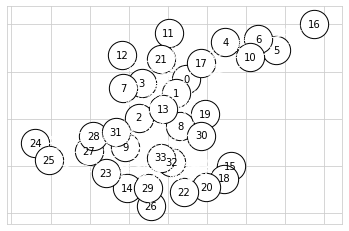

FigureWidget({
    'data': [{'hoverinfo': 'text',
              'marker': {'color': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                                   0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                                   0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                                   0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                         'colorscale': [[0.0, 'rgb(250, 235, 221)'],
                                        [0.00392156862745098, 'rgb(250, 233,
                                        218)'], [0.00784313725490196, 'rgb(250,
                                        232, 216)'], ..., [0.9921568627450981,
                                        'rgb(5, 6, 27)'], [0.996078431372549,
                                        'rgb(4, 5, 26)'], [1.0, 'rgb(3, 5, 26)']],
                         'line': {'color': 'rgb(50,50,50)', 'width': 0.5},
                         'size': 9,
                         'symbol': 'circle'},
              'm

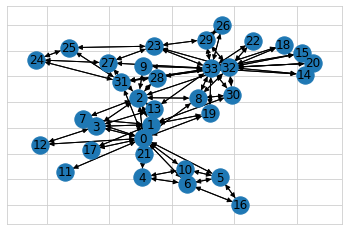

In [28]:
# pytorch
visualize_graph(G3, backend = 'networkx')

# networkx
import networkx as nx
from torch_geometric.utils import to_networkx
Data_G3 = Data(edge_index=G3)
G_nx = to_networkx(Data_G3)
nx.draw_networkx(G_nx)

# networkit
from networkit import vizbridges
nk.vizbridges.widgetFromGraph(G, dimension = nk.vizbridges.Dimension.Three)

### Task 3

In [59]:
from torch_geometric.utils import degree
degree(G1[0])[0]

tensor(1.)

### Task 4

In [63]:
# Get (out) neighbors csr
def get_neighbors_csr(csr, u):
    I = csr.crow_indices()
    J = csr.col_indices()  
    if u >= len(I):
        raise RuntimeError("Node index is out of range")
    return J[I[u] : I[u+1]]

In [64]:
# G1
G1 = G1.sort_by(sort_order = "row")[0]
G1_csr = G1.to_sparse_csr()
print(get_neighbors_csr(G1_csr, 0))

# G2
G2 = G2.sort_by(sort_order = "row")[0]
G2_csr = G2.to_sparse_csr()
print(get_neighbors_csr(G2_csr, 0))

# G3
G3 = G3.sort_by(sort_order = "row")[0]
G3_csr = G3.to_sparse_csr()
print(get_neighbors_csr(G3_csr, 0))

# G4
G4 = G4.sort_by(sort_order = "row")[0]
G4_csr = G4.to_sparse_csr()
print(get_neighbors_csr(G4_csr, 0))


tensor(crow_indices=tensor([0, 1, 4, 5, 6]),
       col_indices=tensor([1, 0, 2, 3, 1, 1]),
       values=tensor([1., 1., 1., 1., 1., 1.]), size=(4, 4), nnz=6,
       layout=torch.sparse_csr)
tensor([1])
tensor([ 18,  47, 100, 115, 226, 252, 258, 309, 382, 408, 522, 539, 597, 652,
        781, 790, 795, 817, 821, 833, 914, 939, 971])
tensor([ 7, 17, 19, 13, 21, 12, 31, 11, 10,  8,  6,  1,  5,  4,  3,  2])
tensor([1862,  633, 2582])


### Task 5

In [32]:
# Get (out) neighbors dense
def get_neighbors_dense(A, u):
    if u > len(A[u]):
        raise RuntimeError("Node index is out of range")
    neighbors = []
    row = A[u]
    for idx, val in enumerate(row):
        if np.abs(val) > 1e-5:
            neighbors.append(idx)
    return neighbors

In [62]:
G3_dense = G3.to_dense()
print(get_neighbors_dense(G3_dense, 0))

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]


In [65]:
import timeit
import random

G2_dense = G2.to_dense()
G2_nodes = len(G2_dense[0])
G4_dense = G4.to_dense()
G4_nodes = len(G4_dense[0])

start = timeit.default_timer()
for i in range(100):
    u = random.randint(0,G2_nodes-1)
    get_neighbors_csr(G2_csr, 0)
end = timeit.default_timer()
print(f"G2 Duration sparse: {end-start}")

start = timeit.default_timer()
for i in range(100):
    u = random.randint(0,G2_nodes-1)
    get_neighbors_dense(G2_dense, 0)
end = timeit.default_timer()
print(f"G2 Duration dense: {end-start}")

start = timeit.default_timer()
for i in range(100):
    u = random.randint(0,G4_nodes-1)
    get_neighbors_csr(G4_csr, 0)
end = timeit.default_timer()
print(f"G4 Duration sparse: {end-start}")

start = timeit.default_timer()
for i in range(100):
    u = random.randint(0,G4_nodes-1)
    get_neighbors_dense(G4_dense, 0)
end = timeit.default_timer()
print(f"G4 Duration dense: {end-start}")

G2 Duration sparse: 0.0015162690542638302
G2 Duration dense: 1.8021792429499328
G4 Duration sparse: 0.0013914196752011776
G4 Duration dense: 4.761007184162736


### Task 6

In [37]:
len(G4[0])

10556

In [66]:
ind = torch.ones(G4_nodes)
num_edges = ind.t() @ G4_dense @ ind
print(num_edges)

tensor(10556.)


### Bonus: Eigenvector Centrality

In [40]:
def power_method(A, v, eps):

    # Init
    v_eigen = v
    v_eigen = 1.0 / torch.norm(v_eigen) * v_eigen
    
    v_ref = v_eigen
    v_eigen = A @ v_eigen
    v_eigen = 1.0 / torch.norm(v_eigen) * v_eigen

    while torch.norm(v_eigen - v_ref) > eps:
        v_ref = v_eigen
        v_eigen = A @ v_eigen
        v_eigen = 1.0 / torch.norm(v_eigen) * v_eigen

    v_lambda = A @ v_eigen
    for idx, val in enumerate(v_lambda):
        if np.abs(val) > 1e-6 and np.abs(v_eigen[idx]) > 1e-6:
            l_eigen = val / v_eigen[idx]
            break
    return l_eigen, v_eigen

def eigen_centrality(A, eps):
    # Use any row of A for getting the number of nodes
    num_nodes = len(A[0])
    
    v = torch.rand(num_nodes)
    
    l_eigen, v_eigen = power_method(A, v, eps)
    ref_scores = np.zeros(num_nodes)

    for u in range(num_nodes):
        neighbors = get_neighbors_dense(A, u)
        for v in neighbors:
            ref_scores[u] = ref_scores[u]+ v_eigen[v]
        ref_scores[u] = ref_scores[u] / l_eigen

    return v_eigen, ref_scores

In [45]:
scores, ref_scores = eigen_centrality(G3_dense, 1e-3)

print(f"Error: {torch.norm(scores-ref_scores)}")

nk.vizbridges.widgetFromGraph(G, dimension = nk.vizbridges.Dimension.Three, nodeScores=scores)

Error: 0.0008028512132282364


FigureWidget({
    'data': [{'hoverinfo': 'text',
              'marker': {'color': array([0.35572177, 0.2660886 , 0.3172452 , 0.2112559 , 0.07599689, 0.07951325,
                                         0.07951324, 0.17099482, 0.22731324, 0.10261788, 0.07599688, 0.05285796,
                                         0.08427489, 0.22644512, 0.10129886, 0.10129886, 0.0236626 , 0.09241032,
                                         0.10129886, 0.14786062, 0.10129886, 0.09241032, 0.10129886, 0.15000047,
                                         0.05705578, 0.05920701, 0.07551251, 0.13340852, 0.13103427, 0.13485157,
                                         0.17467502, 0.19091287, 0.30863008, 0.37341434], dtype=float32),
                         'colorscale': [[0.0, 'rgb(250, 235, 221)'],
                                        [0.00392156862745098, 'rgb(250, 233,
                                        218)'], [0.00784313725490196, 'rgb(250,
                                        232, 216)'], 